In [10]:
from sklearn.metrics import precision_recall_curve, average_precision_score, auc
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [11]:
def get_pr_scores(results_file):
    
    results_df = pd.read_csv(results_file, header=None)
    y_pred = results_df[0].values
    y_true = results_df[1].values
    
    precision, recall, thresholds = precision_recall_curve(y_true, y_pred)
    avg_score = average_precision_score(y_true, y_pred) 
    
    return avg_score, precision, recall, thresholds


def get_auprc(precision, recall):
    # x must be monotonically increasing or decreasing
    return auc(precision, recall)


def get_classwise_accuracy(results_file, threshold=0.5):
    df = pd.read_csv(results_file, header=None)
    pos_df = df.loc[df[1]==1]
    neg_df = df.loc[df[1]==0]
    pos_acc = len(pos_df.loc[pos_df[0]>threshold])/len(pos_df)
    neg_acc = len(neg_df.loc[neg_df[0]<=threshold])/len(neg_df)
    return pos_acc, neg_acc

In [12]:
# GLOBALS
PILOT=False
MODEL_NAME="cogan"

if PILOT:
    suffix = "_pilot"
else:
    suffix = ""

TF="CEBPA"

In [13]:
source_file = f"../../results/mm10/{TF}/{MODEL_NAME}{suffix}_src.csv.gz"
target_file = f"../../results/mm10/{TF}/{MODEL_NAME}{suffix}_tgt.csv.gz"
print(f"The source filepath is {source_file}\nThe target filepath is {target_file}")

The source filepath is ../../results/mm10/CEBPA/cogan_src.csv.gz
The target filepath is ../../results/mm10/CEBPA/cogan_tgt.csv.gz


In [14]:
source_metrics = get_pr_scores(source_file)

In [15]:
target_metrics = get_pr_scores(target_file)

In [16]:
# average precision
print(f"The average source precision score is {source_metrics[0]}\nThe average target precision score is {target_metrics[0]}")

The average source precision score is 0.2727592222059033
The average target precision score is 0.10960208401744437


In [17]:
# AUPRC
print(f"The area under the PR curve for source is {get_auprc(source_metrics[2], source_metrics[1])}\nThe area under the PR curve for target is {get_auprc(target_metrics[2], target_metrics[1])}")

The area under the PR curve for source is 0.27274757130567057
The area under the PR curve for target is 0.10956901209277442


In [ ]:
print("The source PR Curve")
plt.plot(source_metrics[2], source_metrics[1]); # xaxis recall, yaxis precision

The target PR Curve


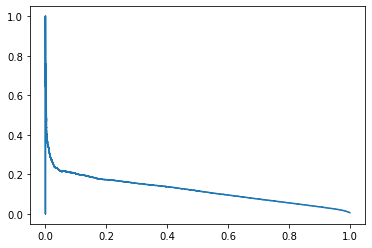

In [10]:
print("The target PR Curve")
plt.plot(target_metrics[2], target_metrics[1]); # xaxis recall, yaxis precision

In [11]:
df_src = pd.read_csv(source_file, header= None)

In [12]:
df_src

,0,1,2,3,4
0,0.012529,0,chr2,3050950,3051450
1,0.010218,0,chr2,3051000,3051500
2,0.009686,0,chr2,3051050,3051550
3,0.053900,0,chr2,3051100,3051600
4,0.022576,0,chr2,3051150,3051650
...,...,...,...,...,...
3164246,0.158321,0,chr2,182012150,182012650
3164247,0.613164,0,chr2,182012200,182012700
3164248,0.525722,0,chr2,182012250,182012750
3164249,0.747708,0,chr2,182012300,182012800


In [13]:
adda_src_file = source_file.replace("cogan", "adda")

In [14]:
df_src_adda = pd.read_csv(adda_src_file, header=None)

In [15]:
df_src_adda

,0,1,2,3,4
0,0.021470,0,chr2,3050950,3051450
1,0.023311,0,chr2,3051000,3051500
2,0.026924,0,chr2,3051050,3051550
3,0.041101,0,chr2,3051100,3051600
4,0.043633,0,chr2,3051150,3051650
...,...,...,...,...,...
3164246,0.284861,0,chr2,182012150,182012650
3164247,0.520810,0,chr2,182012200,182012700
3164248,0.812996,0,chr2,182012250,182012750
3164249,0.553657,0,chr2,182012300,182012800


In [17]:
df_src.loc[~df_src[3].eq(df_src_adda[3])]

,0,1,2,3,4


In [18]:
df_src_adda.loc[~df_src[1].eq(df_src_adda[1])]

,0,1,2,3,4


In [18]:
df_src_adda.equals(df_src)

True

In [19]:
df_src[2].unique()

array(['chr2'], dtype=object)

In [20]:
len(df_src)

3164251

In [21]:
df = pd.read_csv(target_file, header=None)

In [22]:
len(df)

2332000

In [23]:
df.loc[df[1]==1]

,0,1,2,3,4
178,0.648712,1,chr2,20100,20600
179,0.947528,1,chr2,20150,20650
180,0.940436,1,chr2,20200,20700
181,0.931775,1,chr2,20250,20750
182,0.944629,1,chr2,20300,20800
...,...,...,...,...,...
2331900,0.983163,1,chr2,135063150,135063650
2331901,0.972674,1,chr2,135063200,135063700
2331902,0.984029,1,chr2,135063250,135063750
2331903,0.978020,1,chr2,135063300,135063800


In [25]:
df.loc[(df[1]==1)&(df[0]>0.9)]

,0,1,2,3,4
179,0.947528,1,chr2,20150,20650
180,0.940436,1,chr2,20200,20700
181,0.931775,1,chr2,20250,20750
182,0.944629,1,chr2,20300,20800
183,0.916372,1,chr2,20350,20850
...,...,...,...,...,...
2331900,0.983163,1,chr2,135063150,135063650
2331901,0.972674,1,chr2,135063200,135063700
2331902,0.984029,1,chr2,135063250,135063750
2331903,0.978020,1,chr2,135063300,135063800


In [26]:
df[2].unique()

array(['chr2'], dtype=object)